In [201]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

df0 = pd.read_csv('TW_CC_formatted.csv') #pivoted format

df0

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,CATEGORY
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,21-30
1,2,120000,female,university,single,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,21-30
2,3,90000,female,university,single,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,no default,31-40
3,4,50000,female,university,married,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,no default,31-40
4,5,50000,male,university,married,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,no default,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,no default,31-40
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,no default,41-50
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,default,31-40
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,default,41-50


In [202]:
#bucket PAY_AMT, BILL_AMT

def bucket_PAYAMT_BILLAMT(df):
    bins_pa = [1,100,1000,10000,100000,1000001] #exclude 0 and negative
    category_pa = ['< 100','100-999','1000-9999','10000-99999','100000-1000000']
    num = 6
    for x in range(1, num+1):
        df['PAY_AMT_CAT'+str(x)] = pd.cut(df['PAY_AMT'+str(x)], bins_pa, labels = category_pa)
        df['PAY_AMT_CAT'+str(x)] = np.where(df['PAY_AMT'+str(x)] == 0, '0', df['PAY_AMT_CAT'+str(x)])
        df['PAY_AMT_CAT'+str(x)] = np.where(df['PAY_AMT'+str(x)] <0, '< 0', df['PAY_AMT_CAT'+str(x)])
        df['BILL_AMT_CAT'+str(x)] = pd.cut(df['BILL_AMT'+str(x)], bins_pa, labels = category_pa)
        df['BILL_AMT_CAT'+str(x)] = np.where(df['BILL_AMT'+str(x)] == 0, '0', df['BILL_AMT_CAT'+str(x)])
        df['BILL_AMT_CAT'+str(x)] = np.where(df['BILL_AMT'+str(x)] <0, '< 0', df['BILL_AMT_CAT'+str(x)])

In [203]:
bucket_PAYAMT_BILLAMT(df0)

In [204]:
#adding new metrics DEBT_OWED, PCT_CREDIT_UTILIZED, and bucket them

def create_bucket_debtOwed(df, var1, var2):
    num = 6
    bins_bu = [-1000001,-100000,-10000,-1000,-100,-0.000000001] #exclude 0 and positive
    category_bu = ['-(1000000-100000)','-(99999-10000)','-(9999-1000)','-(999-100)','>-100']
    for x in range(1, num+1):
        df['DEBT_OWED'+str(x)] = df[var1+str(x)]-df[var2+str(x)]
        df['DEBT_OWED_CAT'+str(x)] = pd.cut(df['DEBT_OWED'+str(x)], bins_bu, labels = category_bu)
        df['DEBT_OWED_CAT'+str(x)] = np.where(df['DEBT_OWED'+str(x)] == 0, '0', df['DEBT_OWED_CAT'+str(x)])
        df['DEBT_OWED_CAT'+str(x)] = np.where(df['DEBT_OWED'+str(x)] >0, '> 0', df['DEBT_OWED_CAT'+str(x)])

def create_bucket_creditUtilized(df, var1, var2):
    bins_pct = [0.0000000001,0.1,0.2,0.3,0.4,0.5,1] #exclude 0, larger than 1 and negative
    category_pct = ['< 10%','10-20%','20-30%','30-40%','40-50%','> 50%']
    num = 6
    for x in range(1, num+1):
        df['PCT_CREDIT_UTILIZED'+str(x)] = df[var1+str(x)]/df[var2]
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = pd.cut(df['PCT_CREDIT_UTILIZED'+str(x)],bins_pct,labels = category_pct)
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = np.where(df['PCT_CREDIT_UTILIZED'+str(x)] == 0, '0', df['PCT_CREDIT_UTILIZED_CAT'+str(x)] )
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = np.where(df['PCT_CREDIT_UTILIZED'+str(x)] >1, '> 100%', df['PCT_CREDIT_UTILIZED_CAT'+str(x)] )
        df['PCT_CREDIT_UTILIZED_CAT'+str(x)] = np.where(df['PCT_CREDIT_UTILIZED'+str(x)] <0, '< 0', df['PCT_CREDIT_UTILIZED_CAT'+str(x)] )

In [205]:
create_bucket_debtOwed(df0, 'PAY_AMT', 'BILL_AMT')

create_bucket_creditUtilized(df0, 'BILL_AMT', 'LIMIT_BAL')

In [206]:
#formatting Y variable for logistic regression

df0['default payment next month']=np.where(df0['default payment next month'] == 'no default', 0, df0['default payment next month'])
df0['default payment next month']=np.where(df0['default payment next month'] == 'default', 1, df0['default payment next month'])
df0.loc[:,'default payment next month'] = pd.to_numeric(df0['default payment next month'])

In [207]:
df0.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'CATEGORY',
       'PAY_AMT_CAT1', 'BILL_AMT_CAT1', 'PAY_AMT_CAT2', 'BILL_AMT_CAT2',
       'PAY_AMT_CAT3', 'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',
       'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', 'BILL_AMT_CAT6',
       'DEBT_OWED1', 'DEBT_OWED_CAT1', 'DEBT_OWED2', 'DEBT_OWED_CAT2',
       'DEBT_OWED3', 'DEBT_OWED_CAT3', 'DEBT_OWED4', 'DEBT_OWED_CAT4',
       'DEBT_OWED5', 'DEBT_OWED_CAT5', 'DEBT_OWED6', 'DEBT_OWED_CAT6',
       'PCT_CREDIT_UTILIZED1', 'PCT_CREDIT_UTILIZED_CAT1',
       'PCT_CREDIT_UTILIZED2', 'PCT_CREDIT_UTILIZED_CAT2',
       'PCT_CREDIT_UTILIZED3', 'PCT_CREDIT_UTILIZED_CAT3',
       'PCT_CREDIT_UTILIZED4', 'PCT_CREDIT_UTILIZED_

Text(0.5, 1, 'Correlation')

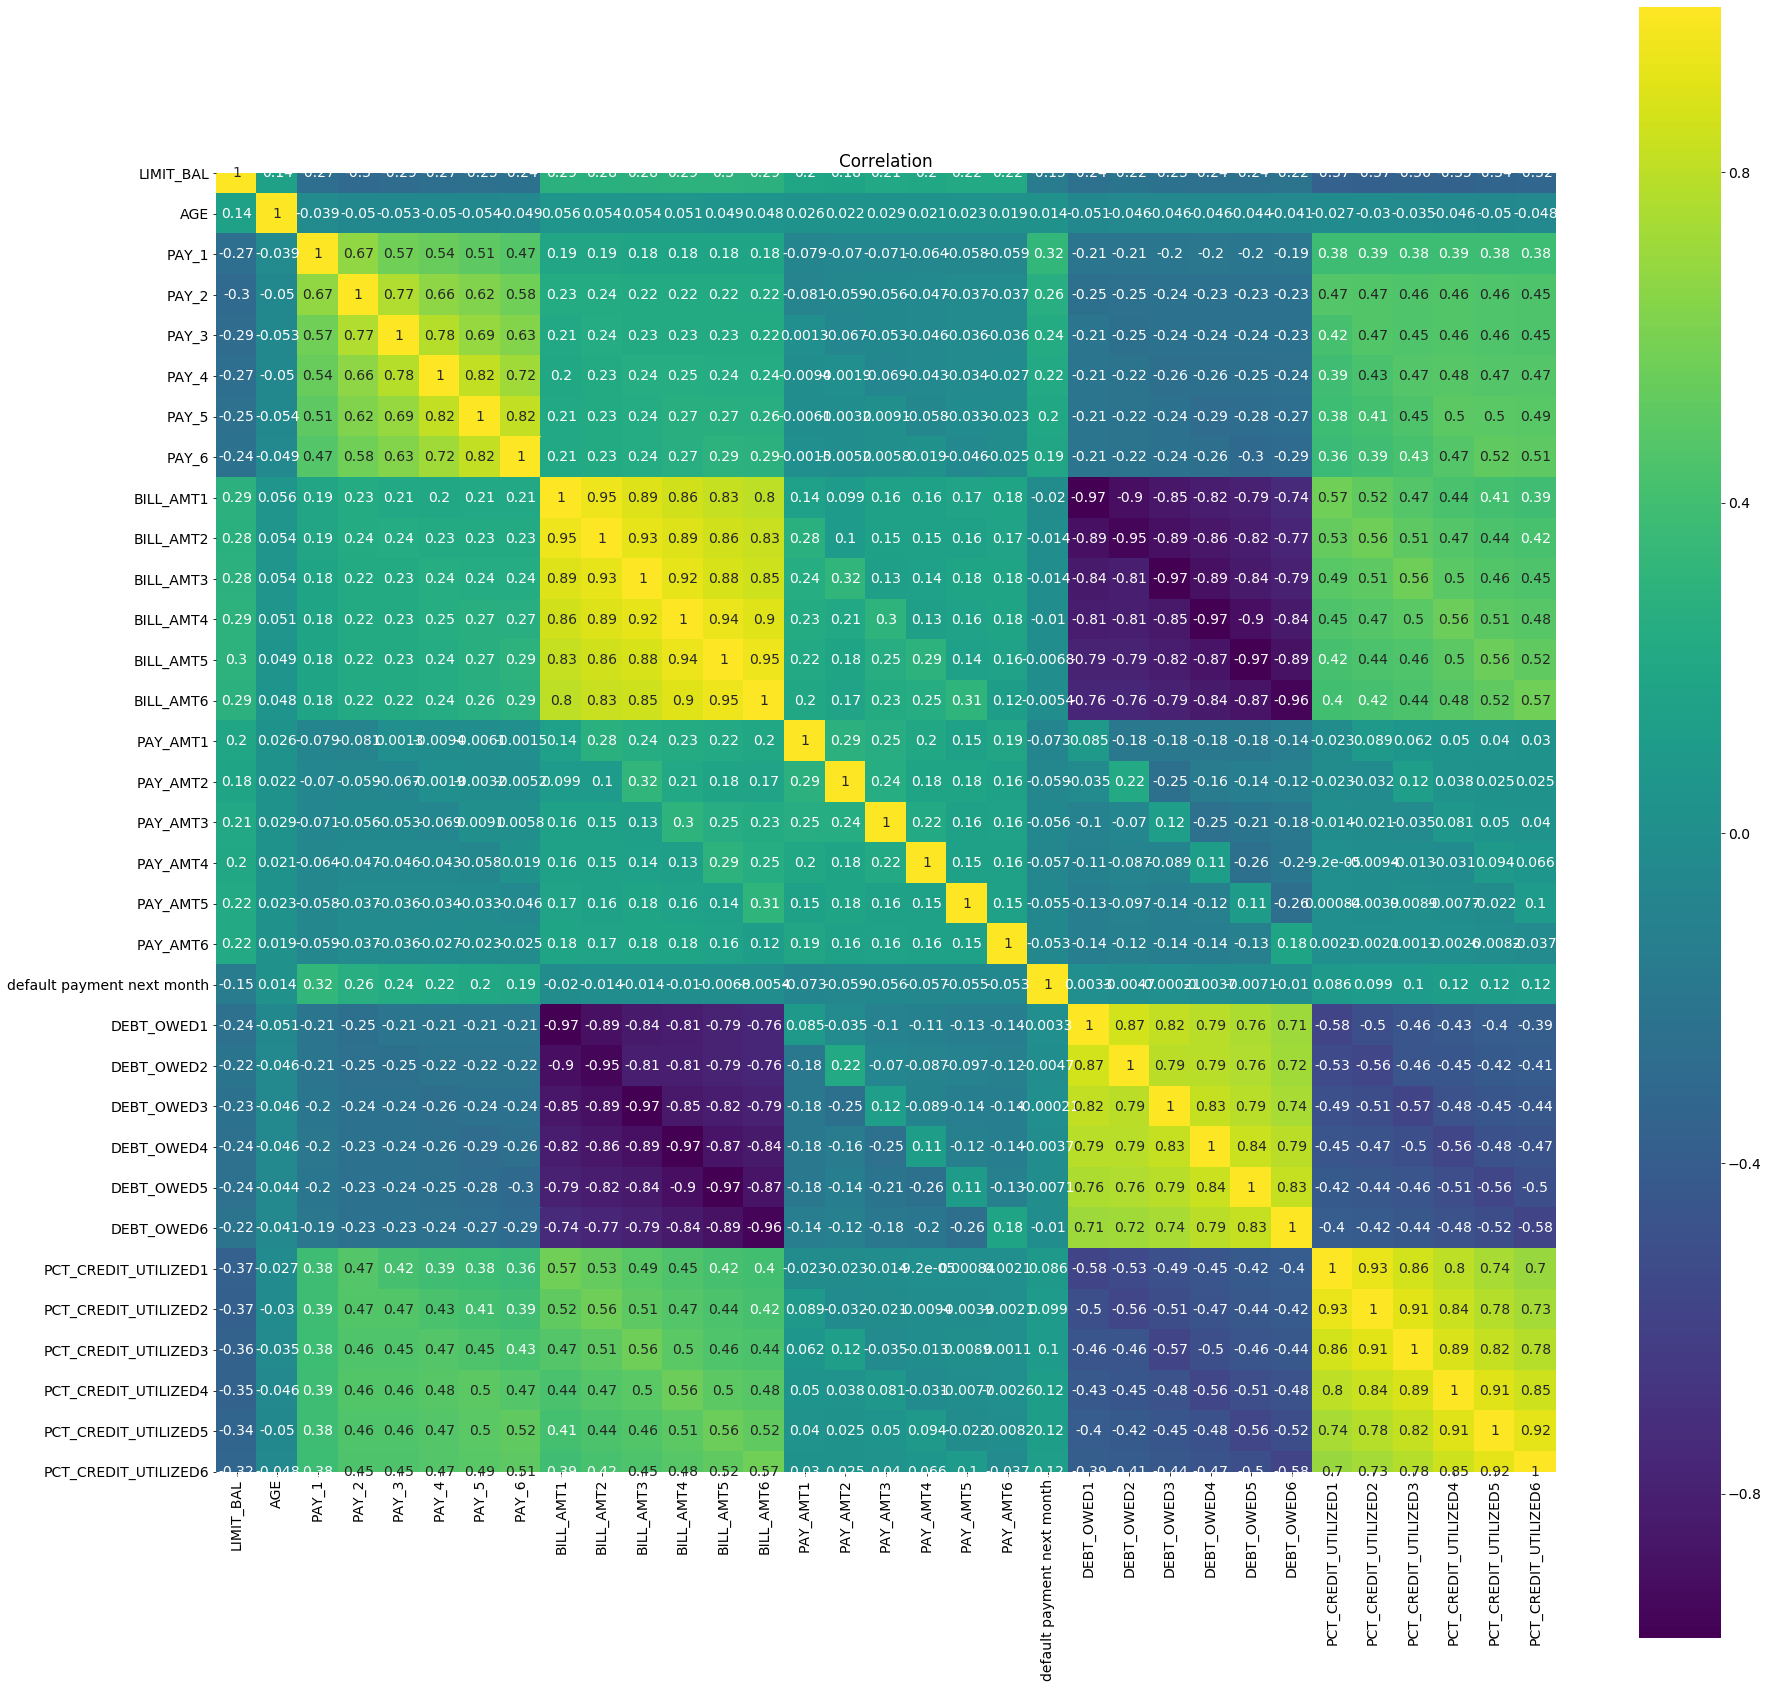

In [208]:
#Finding Correlation between Features and Target Variable using Heatmap

df = df0
df = df.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'CATEGORY',
       'PAY_AMT_CAT1', 'BILL_AMT_CAT1', 'PAY_AMT_CAT2', 'BILL_AMT_CAT2',
       'PAY_AMT_CAT3', 'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',
       'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', 'BILL_AMT_CAT6',
       'DEBT_OWED_CAT1', 'DEBT_OWED_CAT2', 'DEBT_OWED_CAT3', 'DEBT_OWED_CAT4',
       'DEBT_OWED_CAT5', 'DEBT_OWED_CAT6',
       'PCT_CREDIT_UTILIZED_CAT1',
       'PCT_CREDIT_UTILIZED_CAT2',
       'PCT_CREDIT_UTILIZED_CAT3',
       'PCT_CREDIT_UTILIZED_CAT4',
       'PCT_CREDIT_UTILIZED_CAT5',
       'PCT_CREDIT_UTILIZED_CAT6'], 1)

correlation = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation')

In [209]:
#Instantiate PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.loc[:, df.columns != 'default payment next month']
y = df.loc[:, df.columns == 'default payment next month']

columns = X.columns

pca = PCA()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-1.13672015 -1.24601985  1.79456386 ... -0.97510906 -0.95028111
  -0.92264566]
 [-0.3659805  -1.02904717 -0.87499115 ... -0.90115145 -0.86814504
  -0.84394485]
 [-0.59720239 -0.16115646  0.01486052 ... -0.54320748 -0.47646732
  -0.42230057]
 ...
 [-1.05964618  0.16430256  3.57426721 ...  0.91252775  1.00691088
   0.94599798]
 [-0.67427636  0.59824792  0.90471219 ...  0.81418131 -0.52753591
   0.84917256]
 [-0.90549825  1.14067961  0.01486052 ...  1.00682822  0.8999129
  -0.03569397]]


In [210]:
#use fit_transform on features

pca.fit_transform(X)

array([[-2.96508954e+00, -5.17607652e-01, -2.81530433e-01, ...,
         9.53791721e-15,  1.02758483e-14, -1.62270585e-14],
       [-2.37656180e+00, -1.21753213e+00,  1.80951304e+00, ...,
         6.20244526e-16,  5.65215552e-16, -7.69608862e-16],
       [-1.63161797e+00, -6.87696187e-01,  5.13440287e-01, ...,
         2.77447649e-15,  2.70437962e-15,  1.07958018e-14],
       ...,
       [-3.39000836e-01, -3.20550997e+00,  1.69973206e+00, ...,
         5.35409517e-17,  3.03803747e-16, -1.58674508e-16],
       [ 4.69282201e-01, -1.72119275e-01,  5.09906758e-01, ...,
        -5.24065018e-17,  1.36145869e-16,  4.03184998e-16],
       [ 1.06639212e+00, -1.85736793e+00, -1.59696652e+00, ...,
         1.12126342e-17,  5.91795316e-18, -1.27268639e-16]])

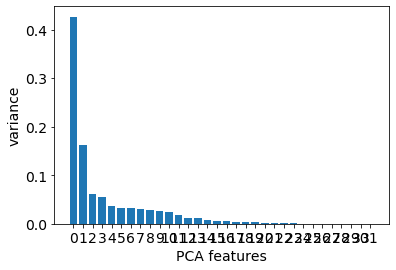

In [211]:
#explained variance ratio: how much variance can be attributed to each PCA

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [212]:
#Over-sampling using SMOTE

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['default payment next month'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-default in oversampled data",len(os_data_y[os_data_y['default payment next month']==0]))
print("Number of default",len(os_data_y[os_data_y['default payment next month']==1]))
print("Proportion of non-default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==1])/len(os_data_X))

length of oversampled data is  32608
Number of non-default in oversampled data 16304
Number of default 16304
Proportion of non-default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [213]:
#call StandardScaler and fit X_train

scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
#pca to fit X_train, transform X_train and X_test

pca = PCA(n_components=4)
pca.fit(X_train)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

[13.6047371   5.1526817   2.01955426  1.8504862 ]
[0.42512779 0.16101364 0.06310807 0.05782494]


In [215]:
#fit logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [216]:
#run prediction using X_test

from sklearn.metrics import mean_squared_error

y_pred = logreg.predict(X_test)
r2 = logreg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred)
print("The model performance is")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))
print("\n")

The model performance is
--------------------------------------
R2 score is 0.8027777777777778
RMSE is 0.19722222222222222




In [217]:
#Check the quality of prediction through cross-validation

from sklearn.model_selection import cross_val_score

y = np.ravel(y)

print(cross_val_score(logreg, X, y, scoring='accuracy', cv=10))
print(cross_val_score(logreg, X, y, cv=10, scoring='r2').mean())
print(cross_val_score(logreg, X, y, cv=10, scoring='r2').std())

[0.80333333 0.802      0.805      0.80333333 0.811      0.81633333
 0.823      0.80966667 0.812      0.81433333]
-0.10290482526201583
0.03686201854521997


In [218]:
#check the resulting hyperplane parameters

print(logreg.intercept_)
print(logreg.coef_)

[-1.4084645]
[[ 0.05032392 -0.31805076 -0.04103715 -0.3849385 ]]


[[6930  130]
 [1645  295]]


[Text(0, 0.5, 'True label'), Text(0.5, 0, 'Predicted label')]

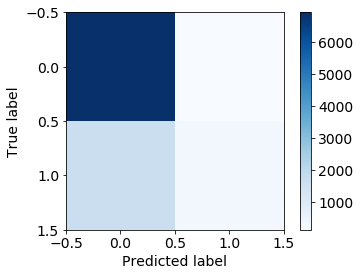

In [219]:
#Confusion Matrix: 
#(TP)(FN)
#(FP)(TN)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label', xlabel='Predicted label')

In [220]:
#Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7060
           1       0.69      0.15      0.25      1940

    accuracy                           0.80      9000
   macro avg       0.75      0.57      0.57      9000
weighted avg       0.78      0.80      0.75      9000



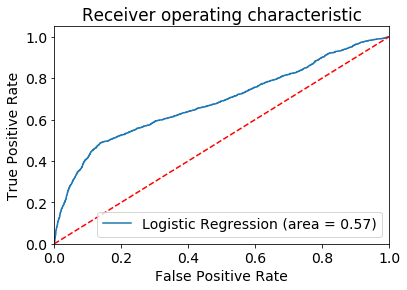

In [221]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [222]:
#Adding demographic columns to see if the prediction can be improved

#Create dummy variables for more demographic fields

cat_vars = ['EDUCATION','MARRIAGE', 'SEX']
for var in cat_vars:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(df0[var], prefix=var)
    df0_temp = df0.join(cat_list)
    df0 = df0_temp

df0.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'CATEGORY',
       'PAY_AMT_CAT1', 'BILL_AMT_CAT1', 'PAY_AMT_CAT2', 'BILL_AMT_CAT2',
       'PAY_AMT_CAT3', 'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',
       'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', 'BILL_AMT_CAT6',
       'DEBT_OWED1', 'DEBT_OWED_CAT1', 'DEBT_OWED2', 'DEBT_OWED_CAT2',
       'DEBT_OWED3', 'DEBT_OWED_CAT3', 'DEBT_OWED4', 'DEBT_OWED_CAT4',
       'DEBT_OWED5', 'DEBT_OWED_CAT5', 'DEBT_OWED6', 'DEBT_OWED_CAT6',
       'PCT_CREDIT_UTILIZED1', 'PCT_CREDIT_UTILIZED_CAT1',
       'PCT_CREDIT_UTILIZED2', 'PCT_CREDIT_UTILIZED_CAT2',
       'PCT_CREDIT_UTILIZED3', 'PCT_CREDIT_UTILIZED_CAT3',
       'PCT_CREDIT_UTILIZED4', 'PCT_CREDIT_UTILIZED_

In [223]:
cat_vars_removal = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', \
                    'CATEGORY', 'PAY_AMT_CAT1','BILL_AMT_CAT1', \
                    'PAY_AMT_CAT2', 'BILL_AMT_CAT2','PAY_AMT_CAT3', \
                    'BILL_AMT_CAT3', 'PAY_AMT_CAT4', 'BILL_AMT_CAT4',\
                    'PAY_AMT_CAT5', 'BILL_AMT_CAT5', 'PAY_AMT_CAT6', \
                    'BILL_AMT_CAT6','DEBT_OWED_CAT1', \
                    'DEBT_OWED_CAT2', 'DEBT_OWED_CAT3', 'DEBT_OWED_CAT4',\
                    'DEBT_OWED_CAT5', 'DEBT_OWED_CAT6',\
                    'PCT_CREDIT_UTILIZED_CAT1',\
                    'PCT_CREDIT_UTILIZED_CAT2',\
                    'PCT_CREDIT_UTILIZED_CAT3',\
                    'PCT_CREDIT_UTILIZED_CAT4',\
                    'PCT_CREDIT_UTILIZED_CAT5',\
                    'PCT_CREDIT_UTILIZED_CAT6']
df_vars = df0.columns.values.tolist()
to_keep = [x for x in df_vars if x not in cat_vars_removal]

In [224]:
df1 = df0[to_keep]

columns = df1.columns

In [225]:
#Instantiate PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df1.loc[:, df1.columns != 'default payment next month']
y = df1.loc[:, df1.columns == 'default payment next month']

columns = X.columns

pca = PCA()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
print(columns)

[[-1.13672015 -1.24601985  1.79456386 ... -0.04246464  0.81016074
  -0.81016074]
 [-0.3659805  -1.02904717 -0.87499115 ... -0.04246464  0.81016074
  -0.81016074]
 [-0.59720239 -0.16115646  0.01486052 ... -0.04246464  0.81016074
  -0.81016074]
 ...
 [-1.05964618  0.16430256  3.57426721 ... -0.04246464 -1.23432296
   1.23432296]
 [-0.67427636  0.59824792  0.90471219 ... -0.04246464 -1.23432296
   1.23432296]
 [-0.90549825  1.14067961  0.01486052 ... -0.04246464 -1.23432296
   1.23432296]]
Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEBT_OWED1', 'DEBT_OWED2',
       'DEBT_OWED3', 'DEBT_OWED4', 'DEBT_OWED5', 'DEBT_OWED6',
       'PCT_CREDIT_UTILIZED1', 'PCT_CREDIT_UTILIZED2', 'PCT_CREDIT_UTILIZED3',
       'PCT_CREDIT_UTILIZED4', 'PCT_CREDIT_UTILIZED5', 'PCT_CREDIT_UTILIZED6',
       

In [226]:
#use fit_transform on features

pca.fit_transform(X)

array([[-2.93814359e+00, -5.62913139e-01, -1.12057499e+00, ...,
         7.01516767e-15,  5.39237969e-16,  6.99484433e-15],
       [-2.34930707e+00, -1.40082274e+00,  1.19233967e+00, ...,
         2.22461449e-14,  8.08749446e-15,  3.20423244e-15],
       [-1.60581150e+00, -8.84218509e-01,  8.75315362e-01, ...,
         1.03610172e-14,  1.88774810e-15, -2.66928172e-15],
       ...,
       [-2.41057349e-01, -3.47435198e+00,  7.43931275e-01, ...,
         6.53605502e-17,  2.90919165e-17,  2.72257070e-17],
       [ 5.18301040e-01, -3.03126933e-01, -1.81584892e+00, ...,
         4.02596039e-17, -7.75544260e-17, -2.25037454e-16],
       [ 1.16019896e+00, -1.98125782e+00, -1.93192300e+00, ...,
         9.70340155e-17,  5.64423311e-17, -2.93249127e-17]])

In [227]:
#Over-sampling using SMOTE

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['default payment next month'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-default in oversampled data",len(os_data_y[os_data_y['default payment next month']==0]))
print("Number of default",len(os_data_y[os_data_y['default payment next month']==1]))
print("Proportion of non-default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['default payment next month']==1])/len(os_data_X))

length of oversampled data is  32608
Number of non-default in oversampled data 16304
Number of default 16304
Proportion of non-default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [228]:
#call StandardScaler and fit X_train

scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [229]:
#pca to fit X_train, transform X_train and X_test

pca = PCA(n_components=4)
pca.fit(X_train)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

[13.63175063  5.29658294  2.42848974  2.07284675]
[0.31700236 0.12317048 0.05647382 0.04820344]


In [230]:
#fit logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [231]:
#run prediction using X_test

from sklearn.metrics import mean_squared_error

y_pred = logreg.predict(X_test)
r2 = logreg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred)
print("The model performance is")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))
print("\n")

The model performance is
--------------------------------------
R2 score is 0.7961111111111111
RMSE is 0.2038888888888889




[[6954  106]
 [1729  211]]


[Text(0, 0.5, 'True label'), Text(0.5, 0, 'Predicted label')]

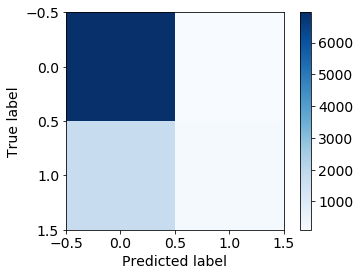

In [232]:
#Confusion Matrix: 
#(TP)(FN)
#(FP)(TN)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)
ax.set(ylabel='True label', xlabel='Predicted label')

In [233]:
#Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7060
           1       0.67      0.11      0.19      1940

    accuracy                           0.80      9000
   macro avg       0.73      0.55      0.54      9000
weighted avg       0.77      0.80      0.73      9000



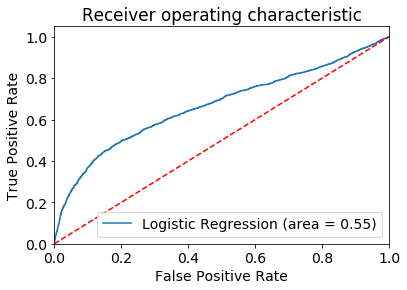

In [234]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()